# Tableau Visualizations

### Covid new cases bubble map
https://10az.online.tableau.com/#/site/shinnaganuma/workbooks/1771760?:origin=card_share_link

### date_school_closure_color_map
https://10az.online.tableau.com/#/site/shinnaganuma/workbooks/1771761?:origin=card_share_link

### school_closure_new_cases_by_region
https://10az.online.tableau.com/#/site/shinnaganuma/workbooks/1771764?:origin=card_share_link

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tslearn.clustering import TimeSeriesKMeans
from collections import Counter
import matplotlib.pyplot as plt 
import glob
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

C:\Users\Kelly\anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [2]:
df1 = pd.read_csv('all_normalized.csv')

## Figure 4

In [3]:
df_cor=df1[['stringency_index_x', 'government_response_index',
       'containment_health_index', 'economic_support_index','c1_school_closing', 'c2_workplace_closing', 'c3_cancel_public_events',
         'c4_restrictions_on_gatherings', 'c5_close_public_transport',
          'c6_stay_at_home_requirements', 'c7_movementrestrictions',
                'c8_internationaltravel', 'e1_income_support',
                         'e2_debtrelief', 'h1_public_information_campaigns',
                     'h2_testing_policy', 'h3_contact_tracing',
                   'h6_facial_coverings', 'h7_vaccination_policy',
       'h8_protection_of_elderly_people']]
corr = df_cor.corr()
corr.style.background_gradient(cmap='coolwarm')

,stringency_index_x,government_response_index,containment_health_index,economic_support_index,c1_school_closing,c2_workplace_closing,c3_cancel_public_events,c4_restrictions_on_gatherings,c5_close_public_transport,c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel,e1_income_support,e2_debtrelief,h1_public_information_campaigns,h2_testing_policy,h3_contact_tracing,h6_facial_coverings,h7_vaccination_policy,h8_protection_of_elderly_people
stringency_index_x,1.000000,0.866487,0.906312,0.247342,0.728414,0.752068,0.765114,0.697132,0.656235,0.690540,0.703941,0.466162,0.161290,0.246925,0.348946,-0.011085,0.112288,0.158129,-0.173777,0.429379
government_response_index,0.866487,1.000000,0.970550,0.546756,0.588005,0.700106,0.683227,0.689138,0.536638,0.598611,0.550907,0.376568,0.415974,0.480523,0.426243,0.303206,0.346593,0.345901,0.086875,0.568337
containment_health_index,0.906312,0.970550,1.000000,0.330481,0.600463,0.718951,0.715405,0.714879,0.583971,0.646486,0.593339,0.369897,0.252432,0.294154,0.419494,0.282449,0.316690,0.360523,0.115253,0.548126
economic_support_index,0.247342,0.546756,0.330481,1.000000,0.219602,0.245307,0.193147,0.213957,0.073473,0.097704,0.098277,0.191912,0.754653,0.867575,0.213535,0.205805,0.260306,0.098724,-0.058847,0.326410
c1_school_closing,0.728414,0.588005,0.600463,0.219602,1.000000,0.540746,0.513658,0.385499,0.407709,0.436095,0.463084,0.342537,0.138888,0.230242,0.202700,-0.109732,0.082460,0.031060,-0.289058,0.289562
c2_workplace_closing,0.752068,0.700106,0.718951,0.245307,0.540746,1.000000,0.586465,0.520869,0.445327,0.515002,0.478882,0.239705,0.191171,0.219864,0.213991,0.036903,0.106859,0.166502,-0.058024,0.391361
c3_cancel_public_events,0.765114,0.683227,0.715405,0.193147,0.513658,0.586465,1.000000,0.635892,0.371900,0.441404,0.444732,0.251081,0.141825,0.183089,0.225365,0.038436,0.102876,0.178494,-0.097007,0.320454
c4_restrictions_on_gatherings,0.697132,0.689138,0.714879,0.213957,0.385499,0.520869,0.635892,1.000000,0.349338,0.434231,0.339110,0.173665,0.200605,0.170587,0.286068,0.135458,0.148894,0.289297,0.026660,0.310555
c5_close_public_transport,0.656235,0.536638,0.583971,0.073473,0.407709,0.445327,0.371900,0.349338,1.000000,0.451521,0.508249,0.244756,-0.011770,0.118006,0.117767,-0.035866,0.012443,0.083171,-0.073174,0.280753
c6_stay_at_home_requirements,0.690540,0.598611,0.646486,0.097704,0.436095,0.515002,0.441404,0.434231,0.451521,1.000000,0.536609,0.176662,0.002732,0.140931,0.140168,-0.022482,0.038627,0.185565,-0.099015,0.408996


## Figure 7

In [4]:
df2 = df1[['country_name', 'date', 'government_response_index']]
df3 = df2.pivot(index='date', columns='country_name', values='government_response_index')
df3 = df3['2020-03-01':'2021-12-01']
df3 = df3.dropna(axis=1)
df3.head()

df = df3
n_clusters = 8
tskm_base = TimeSeriesKMeans(n_clusters = n_clusters, metric = "dtw", max_iter = 100, random_state = 27)
# fit to the model
tskm_base.fit(df.T.values)
# number of data in each cluster
cnt = Counter(tskm_base.labels_)
cluster_labels = {}
for k in cnt:
    cluster_labels['cluster-{}'.format(k)] = cnt[k]
# number of countries on each cluster
print(sorted(cluster_labels.items()))

print(tskm_base.labels_)


[('cluster-0', 17), ('cluster-1', 22), ('cluster-2', 3), ('cluster-3', 15), ('cluster-4', 4), ('cluster-5', 7), ('cluster-6', 6), ('cluster-7', 3)]
[2 0 1 0 4 3 0 0 2 3 0 5 3 0 7 1 6 0 3 0 6 3 5 3 0 3 3 1 7 1 0 3 3 1 1 7 5
 1 6 1 5 0 5 1 6 0 3 4 1 4 0 6 1 1 3 0 1 1 1 4 5 2 1 3 1 1 3 1 1 6 5 0 1 0
 0 1 3]


In [5]:
df_clustered=pd.DataFrame()
df_clustered['country_name']=df3.columns
df_clustered['cluster']=tskm_base.labels_
temp=df1[['country_name','continent']].drop_duplicates()
df_clustered=df_clustered.merge(temp,on='country_name')
df_clustered.head()

,country_name,cluster,continent
0,Afghanistan,2,Asia
1,Albania,0,Europe
2,Algeria,1,Africa
3,Argentina,0,South America
4,Australia,4,Oceania


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

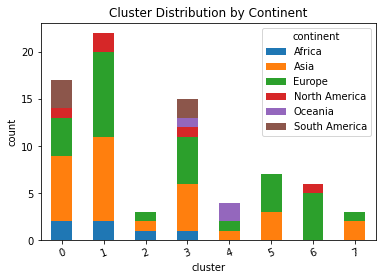

In [6]:
fig=df_clustered.groupby(['cluster','continent'])['country_name'].count().unstack().plot(kind='bar',stacked=True,title='Cluster Distribution by Continent',ylabel='count')
fig.plot()
plt.xticks(rotation=20)